## Machine Learning - Linear Regression

### Utilise Linear Regression to genrate a model for BoomBikes to understand the demand for shared bikes

## 1. Import libraries and set required parameters


In [1]:
#import all the libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
#Enable autocomplete in Jupyter Notebook.
%config IPCompleter.greedy=True

import warnings
warnings.filterwarnings('ignore')
import os

## Set the max display columns to None so that pandas doesn't sandwich the output 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

### 2. Reading and Analysing Data

In [2]:
bikeSharedDaysData = pd.read_csv("./day.csv")
bikeSharedDaysData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Extracting the shape, info, description, column names and data types of the imput data

In [3]:
print("Shape of input data: ", bikeSharedDaysData.shape)

Shape of input data:  (730, 16)


In [4]:
print(bikeSharedDaysData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
bikeSharedDaysData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
### Let us create a function to generate a list of null values in different dataframes
### We will utilize this function extensively througout the notebook. 
def generateNullValuesPercentageTable(dataframe):
    totalNullValues = dataframe.isnull().sum().sort_values(ascending=False)
    percentageOfNullValues = round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending=False),2)
    columnNamesWithPrcntgOfNullValues = pd.concat([totalNullValues, percentageOfNullValues], axis=1, keys=['Total Null Values', 'Percentage of Null Values'])
    return columnNamesWithPrcntgOfNullValues

In [7]:
generateNullValuesPercentageTable(bikeSharedDaysData)

,Total Null Values,Percentage of Null Values
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


#### Observation

From the analysis carried out above we can make the following inferences:

- The dataset consists of 730 rows and 16 columns.
- There are no null values present in the entire dataframe

Analysing certain columns such as season, weathersit as they seem to have categorical data.

In [8]:
bikeSharedDaysData.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

From the data dictionary we know the description of these numbers & given the categorical nature of this column and the definition provided in the data dictionary.


In [9]:
### From the data dictionary we know that the seasons correspond as follows:
### (1:spring, 2:summer, 3:fall, 4:winter) so we will use a function to convert the int
### values to categorical data types

def convertSeasons(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
bikeSharedDaysData.season = bikeSharedDaysData.season.apply(convertSeasons)

bikeSharedDaysData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bikeSharedDaysData.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

As you can see above: we converted the column and were able to preserve the overall counts. 
This makes the data more pliable and better for analysis with the machine learning model we will generate later.

In [11]:
### checking the weathersit column

bikeSharedDaysData.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

From the data dictionary we know that these columns values correspond to the following:
weathersit : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [12]:
### using a function similar to the one we wrote for the weather conversion to categorical column
def convertWeather(x):
    if x==1:
        return 'Clear/Partly Cloudy'
    elif x==2:
        return 'Mist & Clouds'
    elif x==3:
        return 'Light Snow/Light Rain & Scattered Clouds'
    else:
        return 'Heavy Rain/Snow & Fog'

bikeSharedDaysData.weathersit = bikeSharedDaysData.weathersit.apply(convertWeather)

bikeSharedDaysData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist & Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist & Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bikeSharedDaysData.weathersit.value_counts()

Clear/Partly Cloudy                         463
Mist & Clouds                               246
Light Snow/Light Rain & Scattered Clouds     21
Name: weathersit, dtype: int64

Smilar to the way we converted the season column, we were able to preserve the overall counts. This makes the data more pliable and better for analysis with the machine learning model we will generate later.

In [14]:
bikeSharedDaysData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


The datatypes of the weathersit & season columns has been changed to object now.

In [15]:
### Dropping variables that are index values or are not categorical or continous in nature
### Here the cnt variable wont be dropped as that is the sum of casual and registered
### it also represents our target variable
colsToDrop = ['instant', 'dteday', 'casual', 'registered']
bikeShareDataAfterDroppedCols = bikeSharedDaysData.drop(colsToDrop, axis=1)

In [16]:
bikeShareDataAfterDroppedCols.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist & Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist & Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
### Assessing the shape of the new dataframe after columns have been dropped
bikeShareDataAfterDroppedCols.shape

(730, 12)

In [18]:
## Listing the remaining columns with the datatypes:
bikeShareDataAfterDroppedCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [19]:
generateNullValuesPercentageTable(bikeShareDataAfterDroppedCols)

,Total Null Values,Percentage of Null Values
cnt,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0
holiday,0,0.0
mnth,0,0.0


#### Observation

As we can see above the shape of the data changed after we dropped 4 columns. 

- Currently we have 2 categorical columns that we have observed anc successfully converted namely: season and weathersit
- All the others are continuous columns
- There are no null values in the new dataframe either


We will now perform Exploratory Data Analysis on the new dataframe to identify any other categorical columns and look for various relationships between the data

## 3. Exploratory Data Analysis

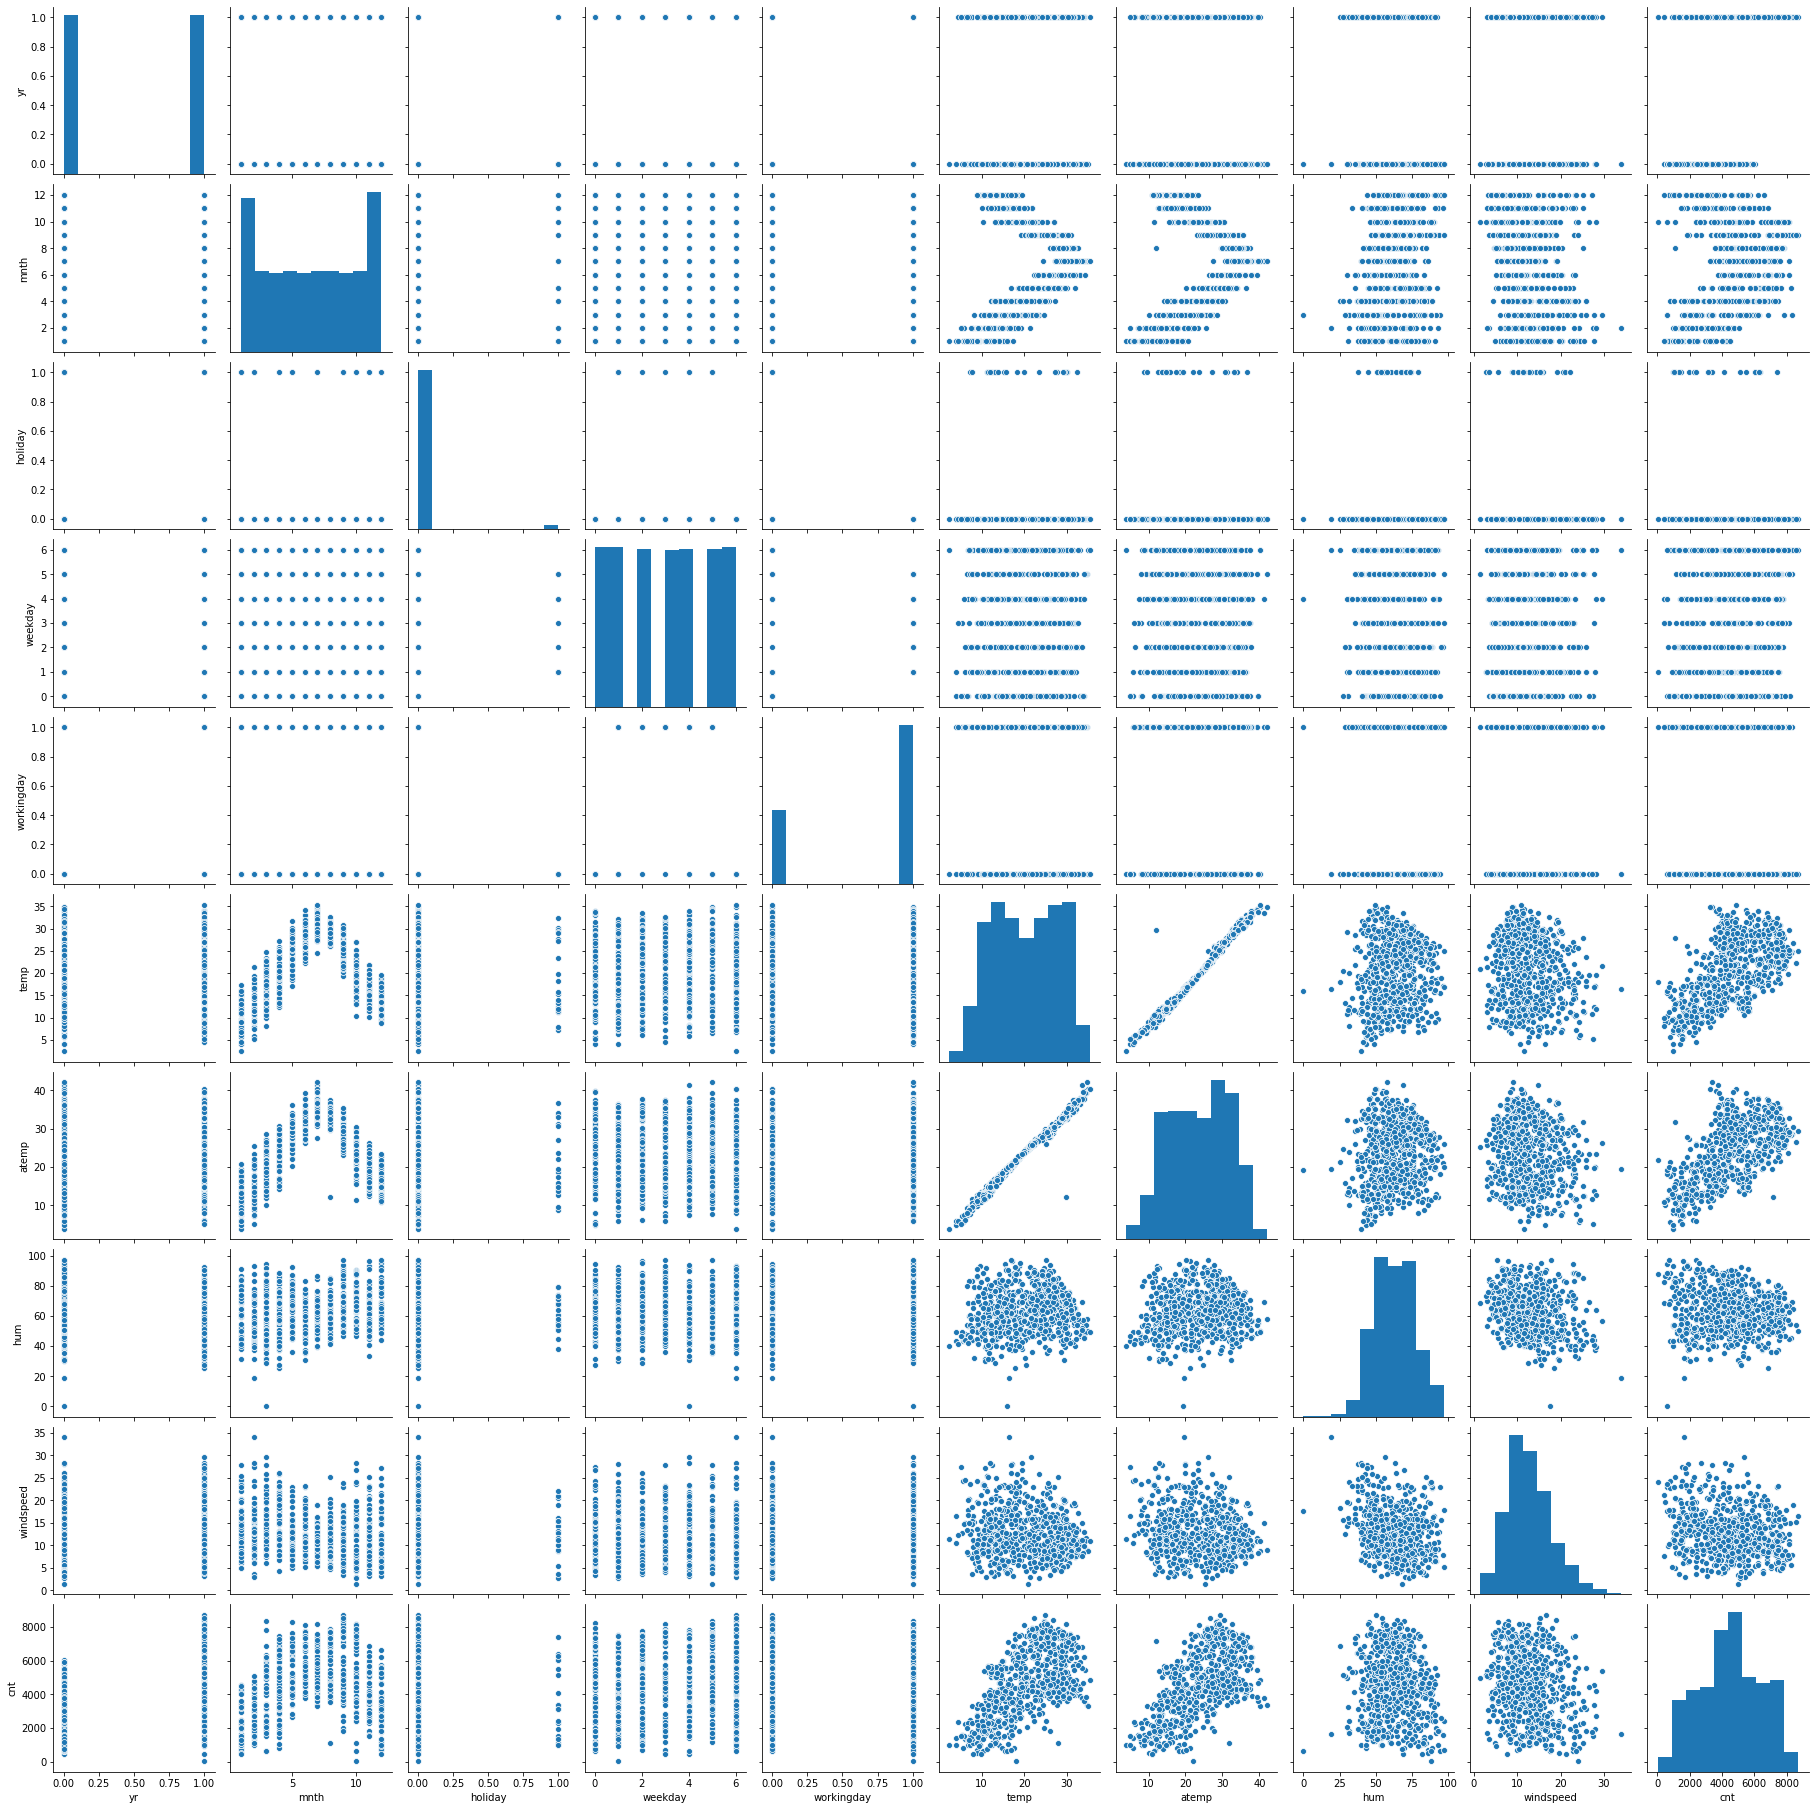

In [20]:
sns.pairplot(bikeShareDataAfterDroppedCols)

#### Observation 

From the visualizations above we can infer that there are a few more categorical columns and therefore we can consider having a linear regression model

We will also plot a heatmap to get the correlation values

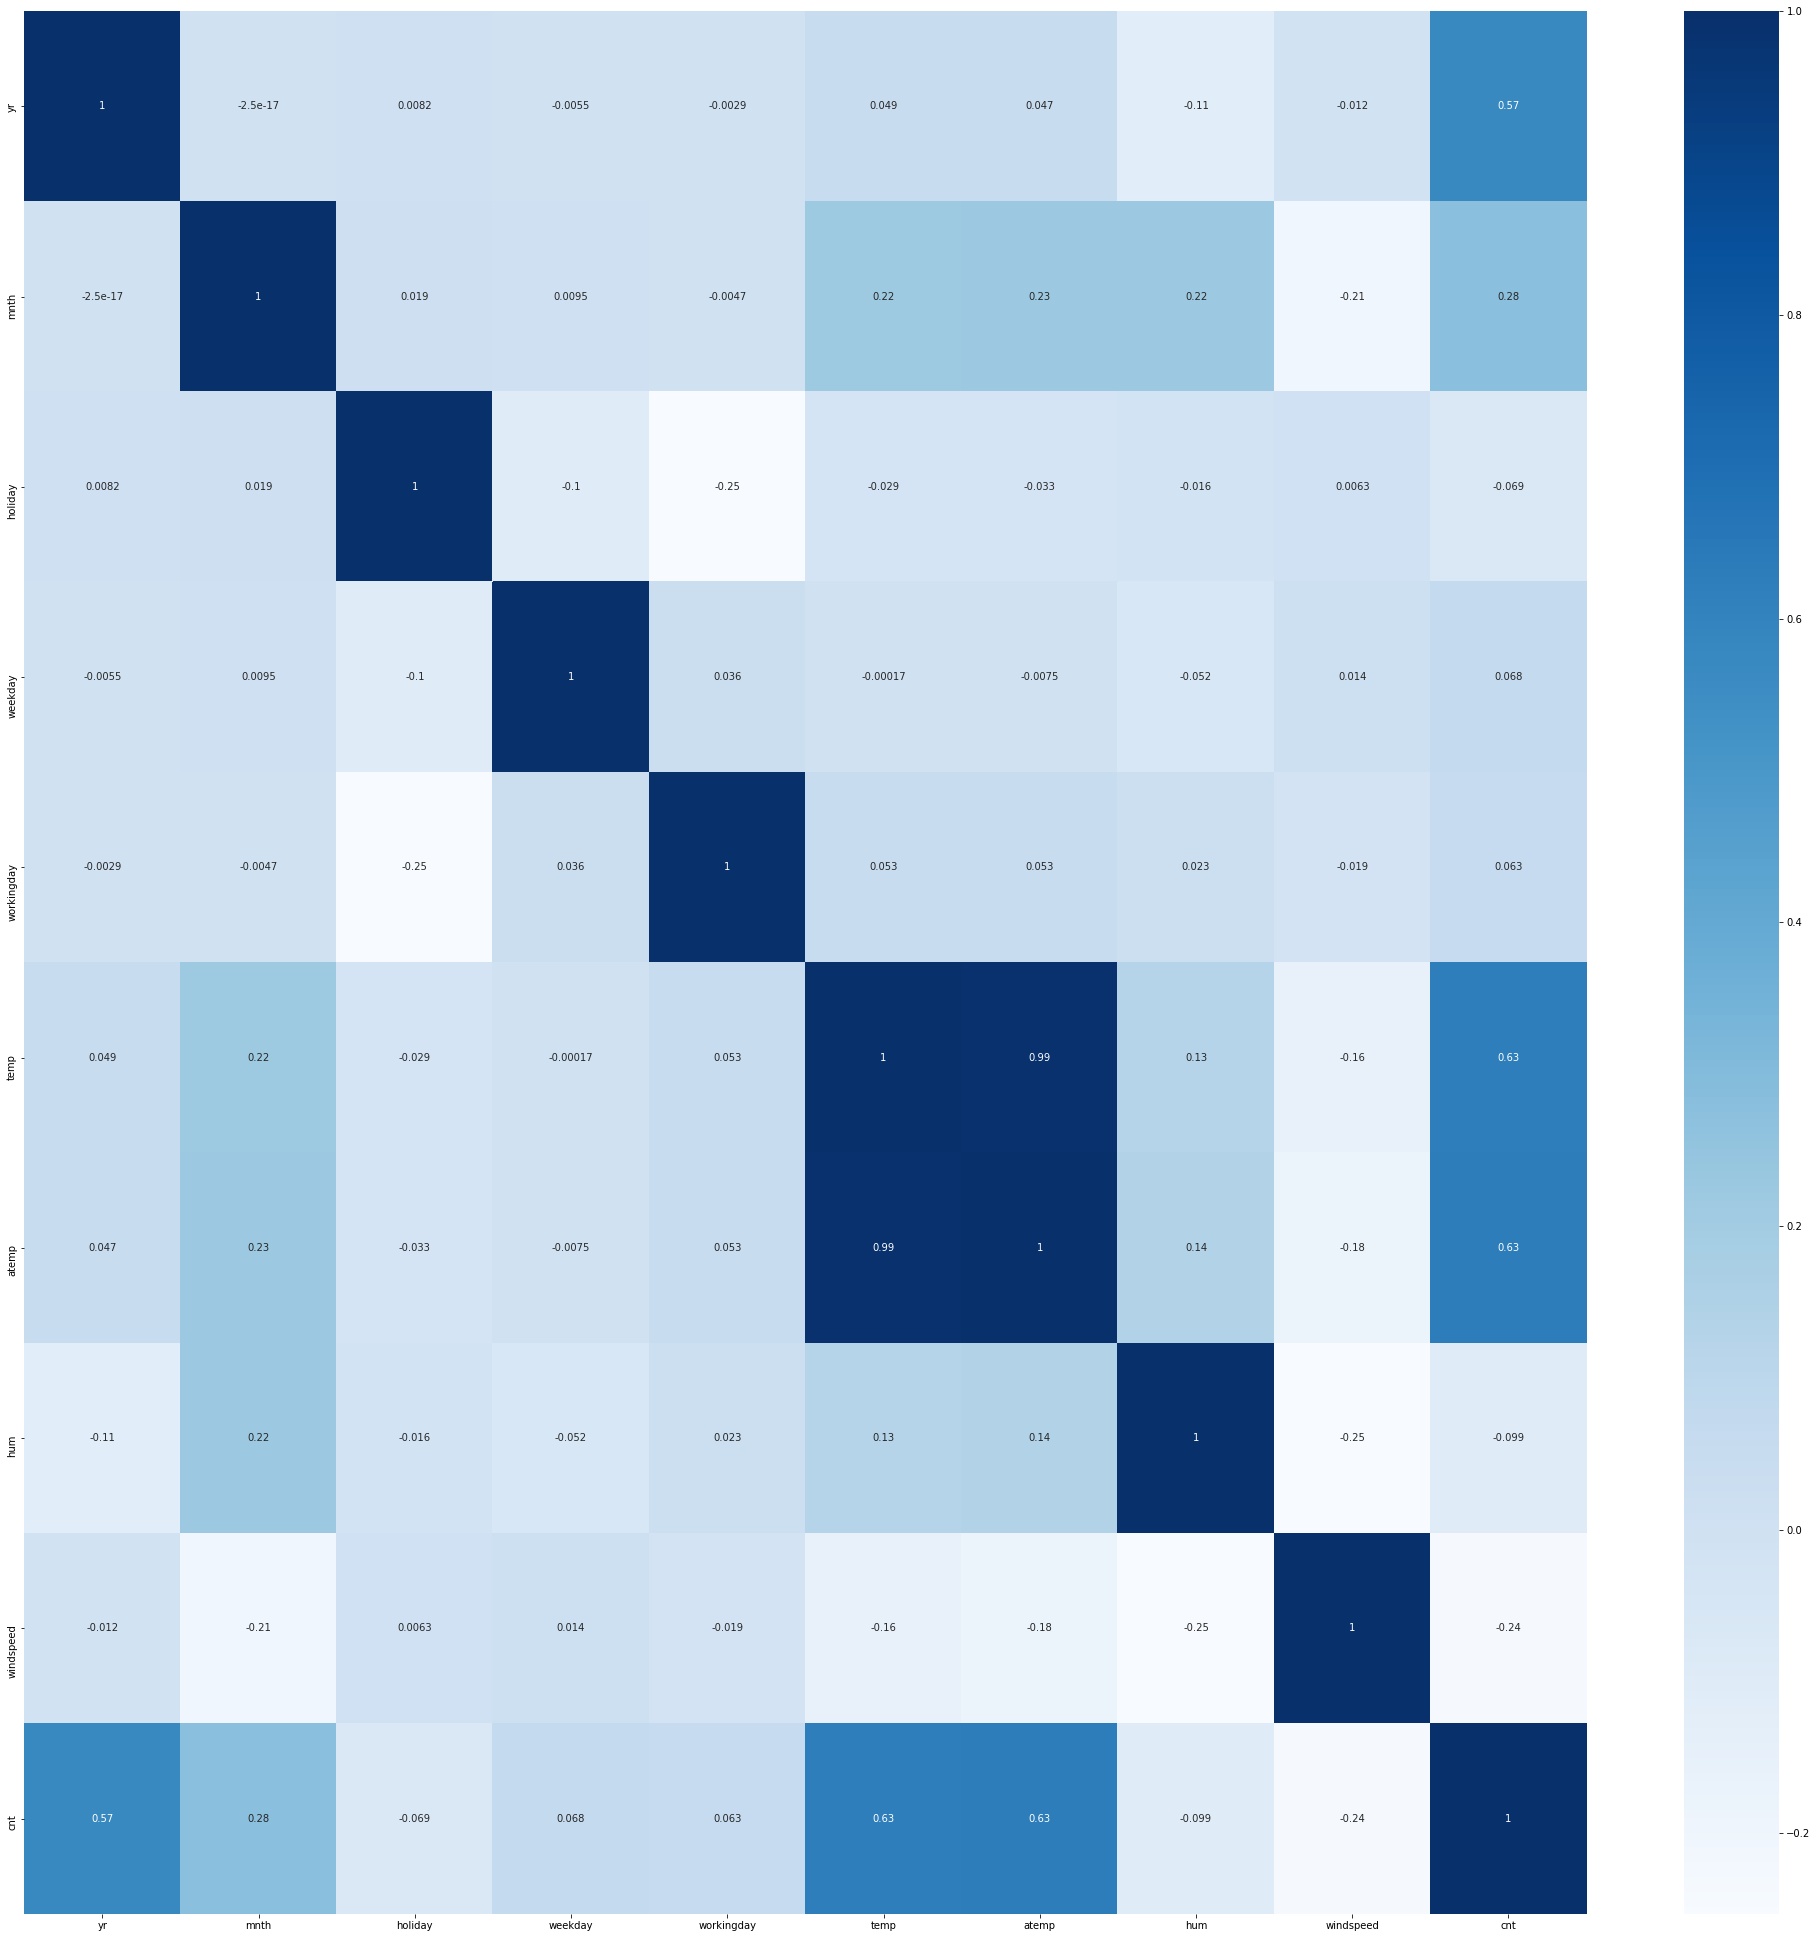

In [21]:

plt.figure(figsize = (35, 35))
sns.heatmap(bikeShareDataAfterDroppedCols.corr(), annot = True, cmap="Blues")
plt.show()

### Observation
Heatmap tips: The darker the colur, the stronger the relationship & viz. 
- We can clearly see from above that 'cnt' is very highly correlated with 'temp' & 'atemp'
- From the scatterplot & heatmap we can also infer that 'temp' & 'atemp' are highly correlated, to avoid multicolinearity we will be dropping one of these columns. However, this will be done after further analysis. 

#### Visulaising differnt kinds of categorical variables

- Categorical Columns are: season,  weathersit

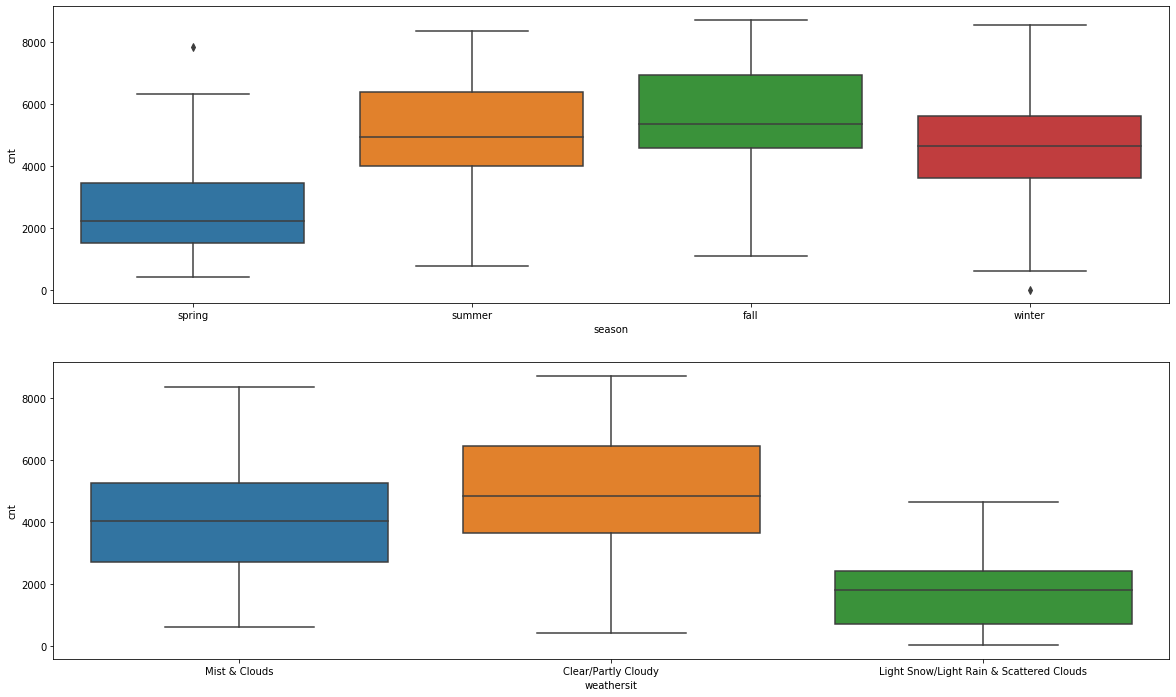

In [22]:
### Generating scatterplots to assess the correlation between categorical columns and count
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeShareDataAfterDroppedCols)
plt.subplot(2,1,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeShareDataAfterDroppedCols)
plt.show()


In [23]:
### Let us create a helper function to help with
### plotting various graphs

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    plt.figure(figsize=(40,20))
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,
                       palette='magma') 
        
    plt.show()

<Figure size 2880x1440 with 0 Axes>

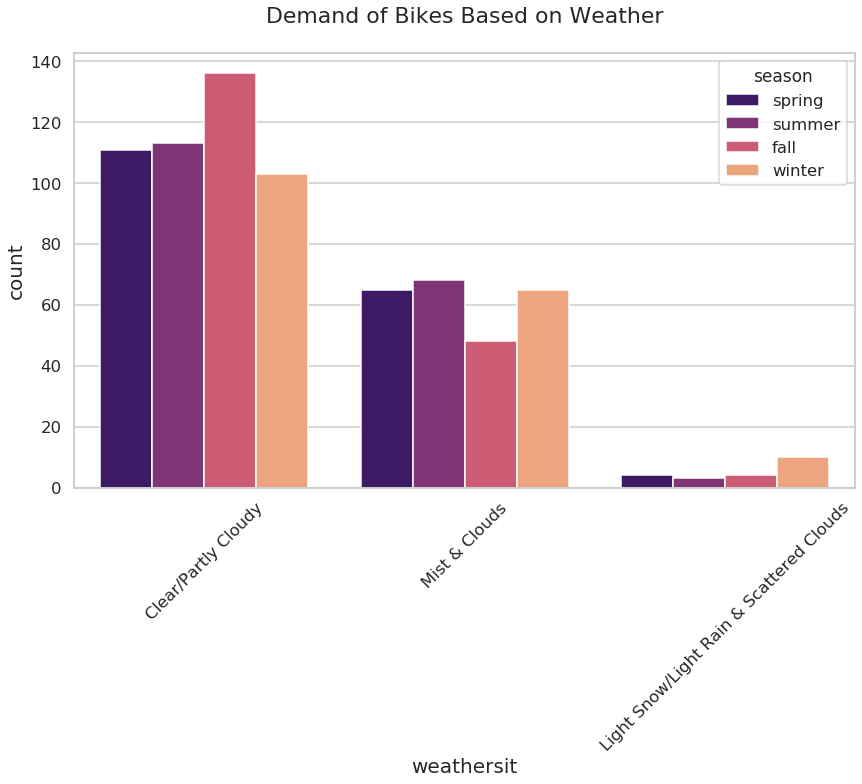

In [24]:
uniplot(bikeShareDataAfterDroppedCols,col='weathersit',title='Demand of Bikes Based on Weather',hue='season')

### Observation

From the plots above we can make the following inferences:

- Demands for bikes is highest in Clear/Partly Cloudy weather, especially in the 'Fall' season
- Demand for bikes is least in the light snow/rain conditions
- Demand for bikes is most during the fall season on average

## 4. Data Preperation for Linear Regression

- Create Dummy Variables
- Other Categorical variables to dummy variables

#### Observation
Converting other numeric columns such as 'mnth', 'weekday' to categorical columns as well using similar encoding method used for seasons & weathersit

We can convert other numeric columns such as holiday, yr, workingday to categorical columns as well, however they are already in a 'categorical' state and aren't really helpful in providing important information.


In [25]:
### converting the mnth column to categorical column
bikeShareDataAfterDroppedCols.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [26]:
### Converting months
def convertMonth(x):
    if x==1:
        return 'Jan'
    elif x==2:
        return 'Feb'
    elif x==3:
        return 'Mar'
    elif x==4:
        return 'Apr'
    elif x==5:
        return 'May'
    elif x==6:
        return 'Jun'
    elif x==7:
        return 'Jul'
    elif x==8:
        return 'Aug'
    elif x==9:
        return 'Sep'
    elif x==10:
        return 'Oct'
    elif x==11:
        return 'Nov'
    else:
        return 'Dec'

bikeShareDataAfterDroppedCols.mnth = bikeShareDataAfterDroppedCols.mnth.apply(convertMonth)
bikeShareDataAfterDroppedCols.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Mist & Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Mist & Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
bikeShareDataAfterDroppedCols.mnth.value_counts()

Jul    62
Dec    62
Mar    62
Aug    62
Oct    62
May    62
Jan    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [28]:
### converting weekdays 

def convertWeekday(x):
    if x==0:
        return 'Sun'
    elif x==1:
        return 'Mon'
    elif x==2:
        return 'Tue'
    elif x==3:
        return 'Wed'
    elif x==4:
        return 'Thur'
    elif x==5:
        return 'Fri'
    else:
        return 'Sat'

# applying the function on 'mnth' variable   
bikeShareDataAfterDroppedCols.weekday = bikeShareDataAfterDroppedCols.weekday.apply(convertWeekday)
bikeShareDataAfterDroppedCols.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist & Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist & Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
bikeShareDataAfterDroppedCols.weekday.value_counts()

Sat     105
Mon     105
Sun     105
Tue     104
Thur    104
Fri     104
Wed     103
Name: weekday, dtype: int64

In [30]:
bikeShareDataAfterDroppedCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Observation

As you can see we have converted the weekday and mnth columns to object types as well. We have preserved the counts as well after the conversion. Let us visualise these relationsips as well. 

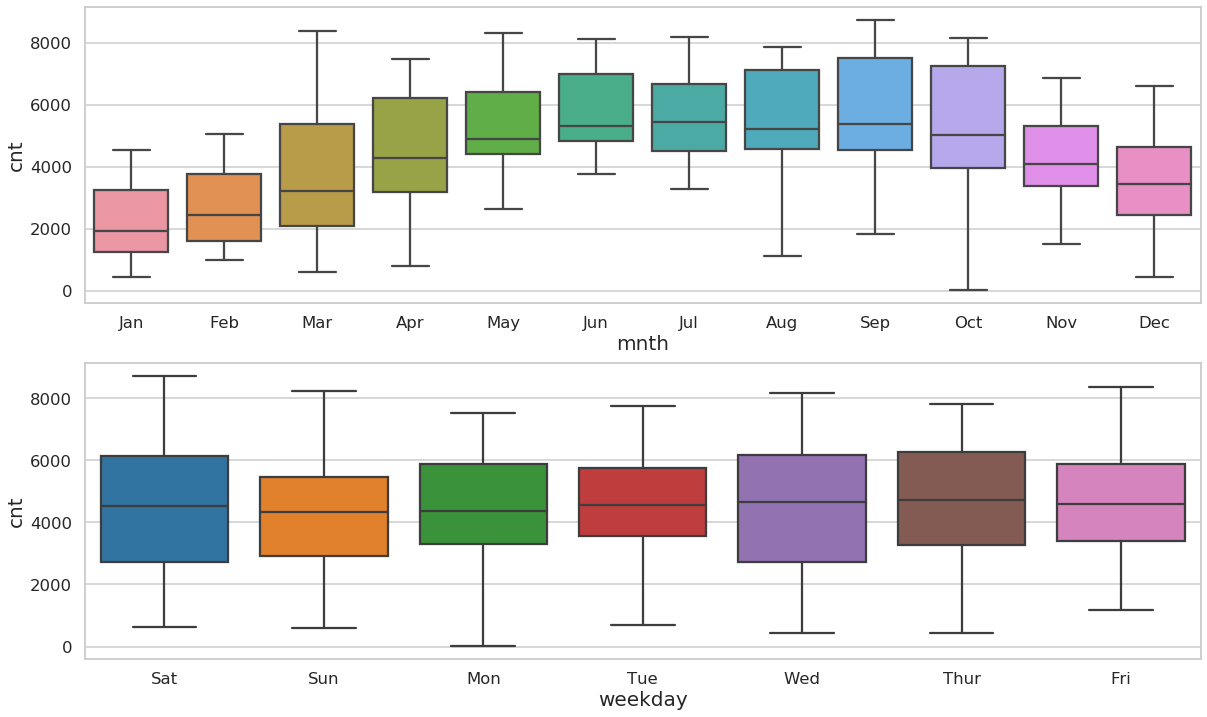

In [31]:
### Generating scatterplots to assess the correlation between categorical columns and count
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeShareDataAfterDroppedCols)
plt.subplot(2,1,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeShareDataAfterDroppedCols)
plt.show()


### Note:
We will now convert our categorical columns, mnth, season, weathersit & weekday to numerical columns and generate dummies for them. Once the dummies are generated we will drop the original columns as their data will be present in their dummy columns.

We will be generating dummies with the 'drop_first' property of the get_dummies function as this will help in dropping the first level dummy & we wont have to explicitly drop them later. We have k-1 dummies for every k columns we create a dummy for.

In [32]:
### Creating dummies
categoricalDummiesList = ['season', 'mnth', 'weekday', 'weathersit']
bikeDataWithDummies = pd.get_dummies(bikeShareDataAfterDroppedCols[categoricalDummiesList], drop_first=True)
bikeDataWithDummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
bikeDataWithDummies.shape

(730, 22)

In [34]:
### Let us now concatenate the dataframes into a new dataframe

bikesDataFrame = pd.concat([bikeShareDataAfterDroppedCols,bikeDataWithDummies], axis=1)
bikesDataFrame.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
0,spring,0,Jan,0,Sat,0,Mist & Clouds,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist & Clouds,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
bikesDataFrame.shape

(730, 34)

### Observation
As you can see that after concatenating the two dataframes our data shape has changed & we have added new columns to our dataset.

As mentioned above, we will now drop the original columns

In [36]:
bikesDataFrame.drop(categoricalDummiesList, axis=1, inplace=True)
bikesDataFrame.shape

(730, 30)

In [37]:
bikesDataFrame.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
bikesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   yr                                                   730 non-null    int64  
 1   holiday                                              730 non-null    int64  
 2   workingday                                           730 non-null    int64  
 3   temp                                                 730 non-null    float64
 4   atemp                                                730 non-null    float64
 5   hum                                                  730 non-null    float64
 6   windspeed                                            730 non-null    float64
 7   cnt                                                  730 non-null    int64  
 8   season_spring                                        730 non-null    u

### Checking for multicollinearity
For our purposes we will be getting rid of any variables with a collinearity of over 0.9

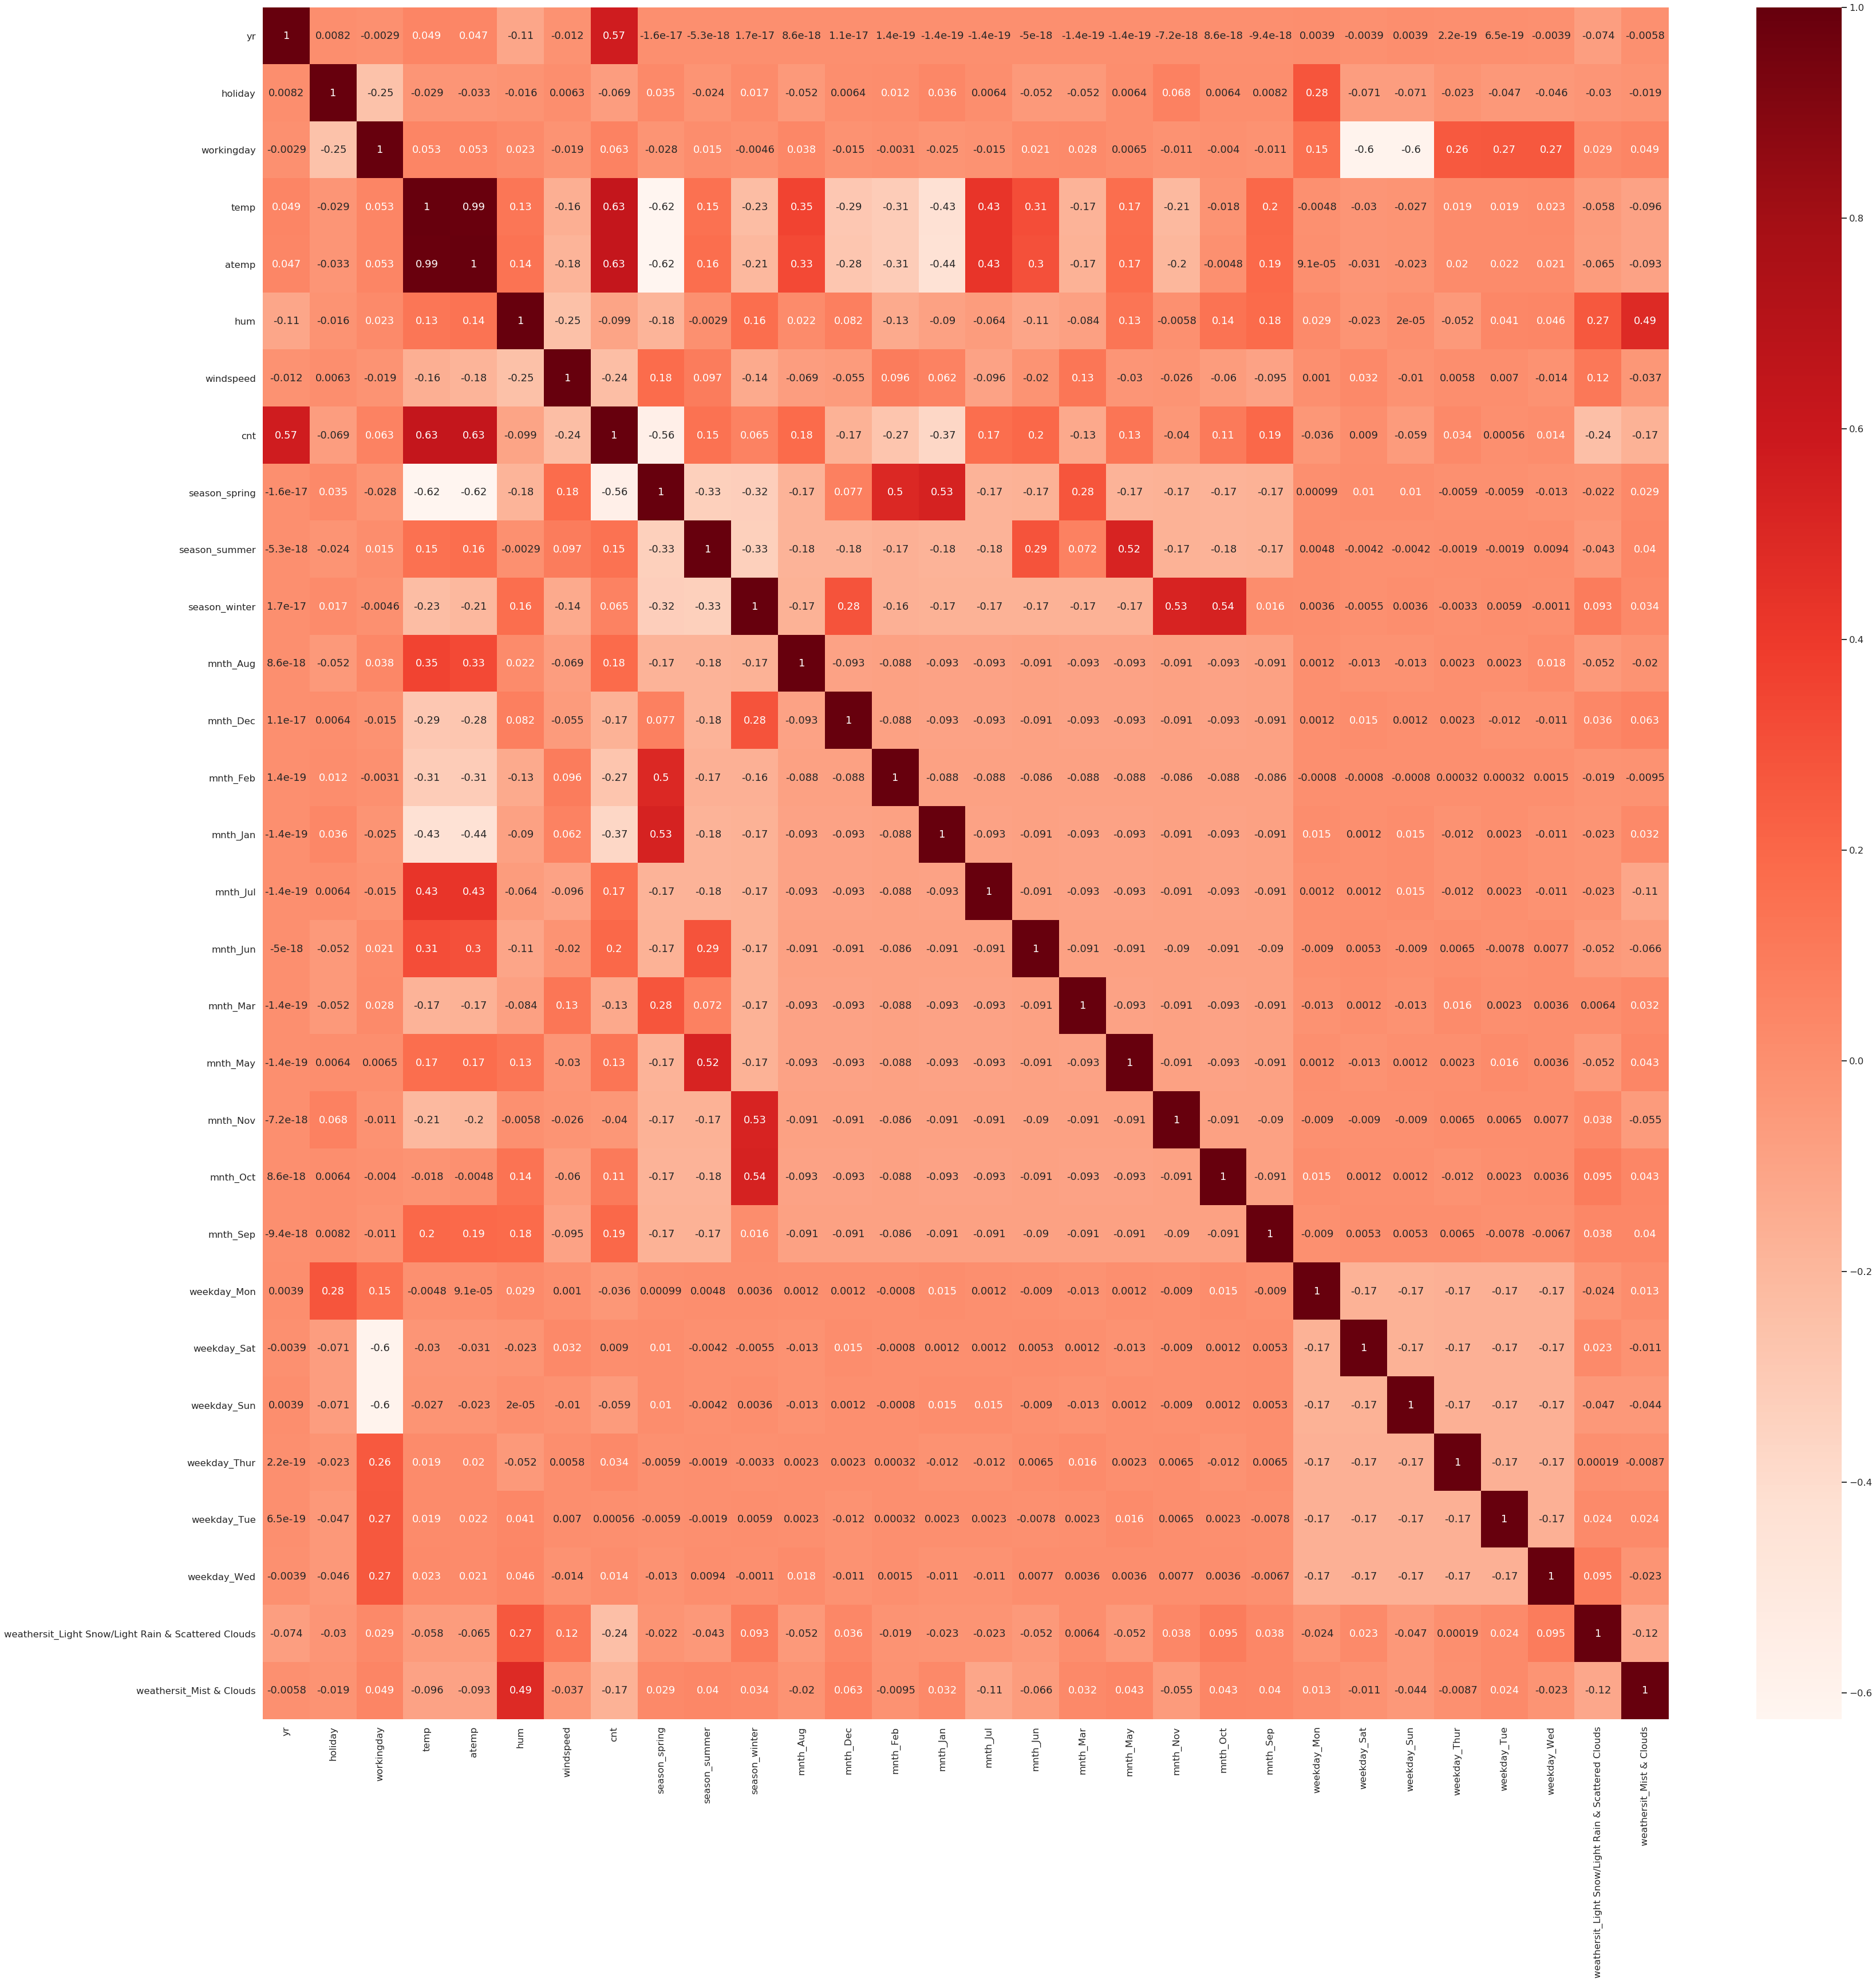

In [39]:
## Polotting a heatmap between all the variables in the bikesDataFrame


plt.figure(figsize = (55, 55))
sns.heatmap(bikesDataFrame.corr(), annot = True, cmap="Reds")
plt.show()

### Observation
As you can see above the 'atemp' feature has a very high collinearity. 
we will drop this column. 

In [40]:
bikesDataFrame.drop('atemp', axis=1, inplace=True)
bikesDataFrame.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
bikesDataFrame.shape

(730, 29)

### Observation:
We have dropped the atemp column as you can see in the
head column & we have also confirmed it with the change in the shape

## 6. Machine Learning 

We will perform machine learning & create a linear regression model by splitting the data into training and testing data. 

We will split the data using the 70/30 rule.
70% of our data will be training data & 30% will be the test data.


In [42]:
trainingData, testingData = train_test_split(bikesDataFrame, train_size=0.7, random_state = 100)

In [43]:
### Confirming the shape of training and testing data to see if 
### it was split properly

print('Training Data Shape: ', trainingData.shape)
print('Testing Data Shape: ', testingData.shape)

Training Data Shape:  (510, 29)
Testing Data Shape:  (220, 29)


In [44]:
trainingData.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Scaling the continuous variables
We will now scale the variables: Temp, hum & windspeed

In [45]:
continousVars = ['temp','hum','windspeed']
minMaxScaler = MinMaxScaler()
trainingData[continousVars] = minMaxScaler.fit_transform(trainingData[continousVars])
trainingData.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
#### Dividing the dataset into X & Y sets for building the model

xTrain = trainingData
yTrain = trainingData.pop('cnt')

print('xTrain shape: ', xTrain.shape)
print('yTrain shape: ', yTrain.shape)

xTrain shape:  (510, 28)
yTrain shape:  (510,)


#### Creating Linear Regressin basic model

In [47]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#### Performing feature elimination using RFE

featureElimination = RFE(linearRegressionModel, 15)
featureElimination = featureElimination.fit(xTrain,yTrain)

In [49]:
### Analysing variables after RFE along with their Ranking

list(zip(xTrain.columns, featureElimination.support_, featureElimination.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thur', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow/Light Rain & Scattered Clouds', True, 1),
 ('weathersit_Mist & Clouds', True, 1)]

In [50]:
columsToUse = xTrain.columns[featureElimination.support_]
print('Top 15 columns we will use are: ', columsToUse)

Top 15 columns we will use are:  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Light Snow/Light Rain & Scattered Clouds',
       'weathersit_Mist & Clouds'],
      dtype='object')


#### Observation

The top 15 variables that we will be using for linear regression are:
- ('yr', True, 1),
- ('holiday', True, 1),
- ('workingday', True, 1),
- ('temp', True, 1),
- ('hum', True, 1),
- ('windspeed', True, 1),
- ('season_spring', True, 1),
- ('season_summer', True, 1),
- ('season_winter', True, 1),
- ('mnth_Jan', True, 1),
- ('mnth_Jul', True, 1),
- ('mnth_Sep', True, 1),
- ('weekday_Sat', True, 1),
- ('weathersit_Light Snow/Light Rain & Scattered Clouds', True, 1),
- ('weathersit_Mist & Clouds', True, 1)

### Linear Regression Model Acceptance Criteria

- The model does not overfit
- The R-Squared & Adjusted R-squared values should be very close to each other(less than 0.5% difference) on both training and test datasets
- The model is simple enough to be understood
- The model is built using significatn features.
- The final model's test and predictions should have R-squared values closer to the training set.
- The residuals are normally distributed

## Model 1

In [51]:
### Creating a Dataframe with RFE Selected variables

xTrainWithCols = xTrain[columsToUse]

xTrainWithRFE = sm.add_constant(xTrainWithCols)


In [52]:
### Creating the linear model

linearModel = sm.OLS(yTrain, xTrainWithRFE).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        23:49:15   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                2211.4527    314.189      7.039      0.000    1594.141    2828.765
yr                                                   2003.7410     69.586     28.795      0.000    1867.019    2140.463
holiday                                              -505.6380    233.674     -2.164      0.031    -964.755     -46.521
workingday                                            376.6676    100.130      3.762      0.000     179.935     573.400
temp                                                 4429.6085    298.555     14.837      0.000    3843.015    5016.202
hum                                                 -1358.5494    324.373     -4.188      0.000   -1995.871    -721.228
windspeed                                           -1618.9605    221.474     -7.310      0.000   -2054.108   -1183.813
season_spring                                        -442.3970    179.551     -2.464      0.014    -795.176     -89.618
season_summer                                         441.2212    128.897      3.423      0.001     187.966     694.476
season_winter                                         810.9723    150.105      5.403      0.000     516.049    1105.895
mnth_Jan                                             -299.9787    150.791     -1.989      0.047    -596.250      -3.707
mnth_Jul                                             -459.9603    156.948     -2.931      0.004    -768.328    -151.592
mnth_Sep                                              707.4835    143.080      4.945      0.000     426.364     988.603
weekday_Sat                                           465.4709    126.015      3.694      0.000     217.880     713.062
weathersit_Light Snow/Light Rain & Scattered Clouds -2150.9597    226.245     -9.507      0.000   -2595.482   -1706.438
weathersit_Mist & Clouds                             -489.5196     90.004     -5.439      0.000    -666.357    -312.682
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
### Let us create a reusable function to calculate VIF values for our models

def vifCalculator(inputModel):
    vif= pd.DataFrame()
    X = inputModel
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [54]:
vifCalculator(xTrainWithCols)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist & Clouds,2.29
0,yr,2.09
12,weekday_Sat,1.98


### Note:

Now that we have our base model, let us define the criteria we will use to drop the various columns and assess the new model:

-  VIF value should be less than 3, which defines the model has very low variance
- The p-value should be less than 0.05.

To drop the columns we will assess the variables based on:
- High p value / High VIF (Definitely drop the feaure)
- High p value / Low VIF
- Low p value / High VIF
- Low p value / Low VIF (Retain)

### Model- 1 evaluation:

- The R-squared value is: 0.848
- The R-squared adjusted vaues is: 0.844
- Feature 'hum' has high collinearity with VIF at 29.37 so we will drop 'hum' in the next model

### Model - 2
    Dropping 'hum' feature
   

In [55]:
model2 = sm.add_constant(xTrainWithCols)
model2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [56]:
linearModel = sm.OLS(yTrain, model2).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        23:49:15   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                2211.4527    314.189      7.039      0.000    1594.141    2828.765
yr                                                   2003.7410     69.586     28.795      0.000    1867.019    2140.463
holiday                                              -505.6380    233.674     -2.164      0.031    -964.755     -46.521
workingday                                            376.6676    100.130      3.762      0.000     179.935     573.400
temp                                                 4429.6085    298.555     14.837      0.000    3843.015    5016.202
hum                                                 -1358.5494    324.373     -4.188      0.000   -1995.871    -721.228
windspeed                                           -1618.9605    221.474     -7.310      0.000   -2054.108   -1183.813
season_spring                                        -442.3970    179.551     -2.464      0.014    -795.176     -89.618
season_summer                                         441.2212    128.897      3.423      0.001     187.966     694.476
season_winter                                         810.9723    150.105      5.403      0.000     516.049    1105.895
mnth_Jan                                             -299.9787    150.791     -1.989      0.047    -596.250      -3.707
mnth_Jul                                             -459.9603    156.948     -2.931      0.004    -768.328    -151.592
mnth_Sep                                              707.4835    143.080      4.945      0.000     426.364     988.603
weekday_Sat                                           465.4709    126.015      3.694      0.000     217.880     713.062
weathersit_Light Snow/Light Rain & Scattered Clouds -2150.9597    226.245     -9.507      0.000   -2595.482   -1706.438
weathersit_Mist & Clouds                             -489.5196     90.004     -5.439      0.000    -666.357    -312.682
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
### dropping 'hum' column
xTrainWithCols = xTrainWithCols.drop(['hum'], axis=1)
xTrainWithCols.shape

(510, 14)

In [58]:
vifCalculator(xTrainWithCols)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


### Model- 2 evaluation:

- The R-squared value is: 0.848
- The R-squared adjusted vaues is: 0.844
- Feature 'temp' has high collinearity with VIF at 7.07 so we will drop 'temp' in the next model

### Model - 3

In [59]:
model3 = sm.add_constant(xTrainWithCols)
model3.head()

,const,yr,holiday,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,1


In [60]:
linearModel = sm.OLS(yTrain, model3).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.60e-188
Time:                        23:49:15   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                1531.5352    273.457      5.601      0.000     994.256    2068.814
yr                                                   2037.9334     70.251     29.009      0.000    1899.906    2175.960
holiday                                              -484.8749    237.492     -2.042      0.042    -951.492     -18.257
workingday                                            402.9488    101.589      3.966      0.000     203.350     602.547
temp                                                 4104.4221    293.059     14.005      0.000    3528.629    4680.215
windspeed                                           -1358.1595    216.062     -6.286      0.000   -1782.671    -933.648
season_spring                                        -520.5502    181.538     -2.867      0.004    -877.231    -163.869
season_summer                                         386.8528    130.367      2.967      0.003     130.711     642.994
season_winter                                         681.1531    149.304      4.562      0.000     387.806     974.500
mnth_Jan                                             -340.6988    152.971     -2.227      0.026    -641.252     -40.146
mnth_Jul                                             -416.0975    159.193     -2.614      0.009    -728.875    -103.320
mnth_Sep                                              655.9879    144.913      4.527      0.000     371.268     940.708
weekday_Sat                                           506.7844    127.710      3.968      0.000     255.864     757.705
weathersit_Light Snow/Light Rain & Scattered Clouds -2527.6314    211.042    -11.977      0.000   -2942.280   -2112.983
weathersit_Mist & Clouds                             -706.3222     74.848     -9.437      0.000    -853.382    -559.263
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
### dropping 'temp' column
xTrainWithCols = xTrainWithCols.drop(['temp'], axis=1)
xTrainWithCols.shape

(510, 13)

In [62]:
vifCalculator(xTrainWithCols)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_spring,2.97
5,season_summer,2.29
6,season_winter,1.98
0,yr,1.91
10,weekday_Sat,1.69
7,mnth_Jan,1.60
12,weathersit_Mist & Clouds,1.57
8,mnth_Jul,1.30


### Model - 3 Evaluation
- The R-squared value is: 0.843
- The R-squared adjusted vaues is: 0.838
- The values for R-squared & R-squared adjusted have reduced slightly
- We will now drop windspeed since its value is slightly above 3.

### Model - 4

In [63]:
model4 = sm.add_constant(xTrainWithCols)
model4.head()

,const,yr,holiday,workingday,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1.0,1,0,1,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.188475,0,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0.380981,0,1,0,0,0,0,0,0,1


In [64]:
linearModel = sm.OLS(yTrain, model4).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.44e-154
Time:                        23:49:15   Log-Likelihood:                -4200.2
No. Observations:                 510   AIC:                             8428.
Df Residuals:                     496   BIC:                             8488.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                4753.6830    174.487     27.244      0.000    4410.858    5096.508
yr                                                   2153.7591     82.351     26.153      0.000    1991.960    2315.559
holiday                                              -492.6061    280.346     -1.757      0.080   -1043.419      58.206
workingday                                            415.5700    119.915      3.466      0.001     179.965     651.175
windspeed                                           -1632.2880    254.001     -6.426      0.000   -2131.338   -1133.238
season_spring                                       -2261.6622    156.165    -14.483      0.000   -2568.489   -1954.836
season_summer                                        -371.1476    140.003     -2.651      0.008    -646.220     -96.075
season_winter                                        -662.2355    135.062     -4.903      0.000    -927.600    -396.871
mnth_Jan                                             -892.0141    174.493     -5.112      0.000   -1234.851    -549.178
mnth_Jul                                              -82.8588    185.808     -0.446      0.656    -447.927     282.209
mnth_Sep                                              617.4099    171.031      3.610      0.000     281.376     953.444
weekday_Sat                                           488.9222    150.747      3.243      0.001     192.741     785.104
weathersit_Light Snow/Light Rain & Scattered Clouds -2637.1615    248.953    -10.593      0.000   -3126.293   -2148.030
weathersit_Mist & Clouds                             -766.3624     88.209     -8.688      0.000    -939.672    -593.052
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
### dropping 'windspeed' column
xTrainWithCols = xTrainWithCols.drop(['windspeed'], axis=1)
xTrainWithCols.shape

(510, 12)

In [66]:
vifCalculator(xTrainWithCols)

,Features,VIF
2,workingday,3.49
3,season_spring,2.41
4,season_summer,1.92
0,yr,1.88
5,season_winter,1.80
9,weekday_Sat,1.59
6,mnth_Jan,1.58
11,weathersit_Mist & Clouds,1.57
7,mnth_Jul,1.25
8,mnth_Sep,1.24


### Model - 4 Evaluation
- The R-squared value is: 0.781
- The R-squared adjusted vaues is: 0.775
- The values for R-squared & R-squared adjusted have reduced significantly
- We will now drop month_Jul since its p-value above 0.05.

### Model - 5

In [67]:
model5 = sm.add_constant(xTrainWithCols)
model5.head()

,const,yr,holiday,workingday,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1.0,1,0,1,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0,1,0,0,0,0,1,0,1
111,1.0,0,0,1,0,1,0,0,0,0,0,0,1


In [68]:
linearModel = sm.OLS(yTrain, model5).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.97e-146
Time:                        23:49:15   Log-Likelihood:                -4220.5
No. Observations:                 510   AIC:                             8467.
Df Residuals:                     497   BIC:                             8522.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                4311.5850    166.727     25.860      0.000    3984.009    4639.161
yr                                                   2145.2624     85.613     25.058      0.000    1977.054    2313.471
holiday                                              -527.1417    291.437     -1.809      0.071   -1099.741      45.458
workingday                                            422.3646    124.677      3.388      0.001     177.405     667.324
season_spring                                       -2471.9706    158.767    -15.570      0.000   -2783.909   -2160.033
season_summer                                        -504.0318    143.972     -3.501      0.001    -786.900    -221.163
season_winter                                        -691.3072    140.352     -4.926      0.000    -967.064    -415.550
mnth_Jan                                             -767.8891    180.314     -4.259      0.000   -1122.161    -413.617
mnth_Jul                                              -75.0906    193.190     -0.389      0.698    -454.660     304.479
mnth_Sep                                              664.8498    177.663      3.742      0.000     315.786    1013.914
weekday_Sat                                           458.4862    156.662      2.927      0.004     150.685     766.287
weathersit_Light Snow/Light Rain & Scattered Clouds -2798.5136    257.529    -10.867      0.000   -3304.493   -2292.534
weathersit_Mist & Clouds                             -754.2796     91.695     -8.226      0.000    -934.437    -574.122
==============================================================================
Omnibus:                       43.351   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.695
Skew:                          -0.443   Prob(JB):                     1.84e-23
Kurtosis:                       5.035   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
### dropping 'month_Jul' column
xTrainWithCols = xTrainWithCols.drop(['mnth_Jul'], axis=1)
xTrainWithCols.shape

(510, 11)

In [70]:
vifCalculator(xTrainWithCols)

,Features,VIF
2,workingday,3.06
3,season_spring,2.25
0,yr,1.84
4,season_summer,1.75
5,season_winter,1.66
6,mnth_Jan,1.58
10,weathersit_Mist & Clouds,1.57
8,weekday_Sat,1.48
7,mnth_Sep,1.20
1,holiday,1.10


### Model 5 Evaluation

- The R-squared value is: 0.762
- The R-squared adjusted vaues is: 0.757
- The values for R-squared & R-squared adjusted have reduced significantly
- We will now drop workingday since its VIF value above 3.

### Model - 6

In [71]:
model6 = sm.add_constant(xTrainWithCols)
model6.head()

,const,yr,holiday,workingday,season_spring,season_summer,season_winter,mnth_Jan,mnth_Sep,weekday_Sat,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
576,1.0,1,0,1,0,0,0,0,0,0,0,0
426,1.0,1,0,0,1,0,0,0,0,1,0,1
728,1.0,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0,1,0,0,0,1,0,1
111,1.0,0,0,1,0,1,0,0,0,0,0,1


In [72]:
linearModel = sm.OLS(yTrain, model6).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.73e-147
Time:                        23:49:15   Log-Likelihood:                -4220.6
No. Observations:                 510   AIC:                             8465.
Df Residuals:                     498   BIC:                             8516.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                4282.3598    148.683     28.802      0.000    3990.237    4574.483
yr                                                   2145.5297     85.538     25.083      0.000    1977.471    2313.589
holiday                                              -523.8515    291.065     -1.800      0.073   -1095.719      48.016
workingday                                            424.2677    124.475      3.408      0.001     179.707     668.828
season_spring                                       -2445.1112    142.818    -17.120      0.000   -2725.712   -2164.511
season_summer                                        -477.3885    126.499     -3.774      0.000    -725.926    -228.851
season_winter                                        -666.0318    124.273     -5.359      0.000    -910.196    -421.867
mnth_Jan                                             -768.2879    180.158     -4.265      0.000   -1122.251    -414.325
mnth_Sep                                              685.7715    169.169      4.054      0.000     353.399    1018.144
weekday_Sat                                           459.5897    156.503      2.937      0.003     152.103     767.076
weathersit_Light Snow/Light Rain & Scattered Clouds -2799.4032    257.299    -10.880      0.000   -3304.929   -2293.878
weathersit_Mist & Clouds                             -751.8832     91.409     -8.225      0.000    -931.479    -572.288
==============================================================================
Omnibus:                       43.275   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.982
Skew:                          -0.444   Prob(JB):                     2.63e-23
Kurtosis:                       5.026   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
### dropping 'workingday' column
xTrainWithCols = xTrainWithCols.drop(['workingday'], axis=1)
xTrainWithCols.shape

(510, 10)

In [74]:
vifCalculator(xTrainWithCols)

,Features,VIF
2,season_spring,1.88
0,yr,1.64
5,mnth_Jan,1.58
9,weathersit_Mist & Clouds,1.51
4,season_winter,1.38
3,season_summer,1.37
7,weekday_Sat,1.16
6,mnth_Sep,1.11
8,weathersit_Light Snow/Light Rain & Scattered C...,1.06
1,holiday,1.05


### Model 6 Evaluation 
- The R-squared value is: 0.762
- The R-squared adjusted vaues is: 0.757
- The values for R-squared & R-squared adjusted have reduced significantly
- We will now drop holiday since its p-value above 0.05.

### Model 7

In [75]:
model7 = sm.add_constant(xTrainWithCols)
linearModel = sm.OLS(yTrain, model7).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.07e-146
Time:                        23:49:15   Log-Likelihood:                -4226.5
No. Observations:                 510   AIC:                             8475.
Df Residuals:                     499   BIC:                             8522.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                4630.1034    109.301     42.361      0.000    4415.357    4844.850
yr                                                   2148.2473     86.439     24.853      0.000    1978.418    2318.077
holiday                                              -867.2954    275.957     -3.143      0.002   -1409.477    -325.114
season_spring                                       -2456.2377    144.292    -17.023      0.000   -2739.732   -2172.743
season_summer                                        -478.4001    127.837     -3.742      0.000    -729.565    -227.235
season_winter                                        -687.5353    125.426     -5.482      0.000    -933.964    -441.106
mnth_Jan                                             -763.4132    182.058     -4.193      0.000   -1121.109    -405.718
mnth_Sep                                              699.7561    170.909      4.094      0.000     363.966    1035.546
weekday_Sat                                           109.8561    119.423      0.920      0.358    -124.778     344.491
weathersit_Light Snow/Light Rain & Scattered Clouds -2755.7540    259.700    -10.611      0.000   -3265.994   -2245.514
weathersit_Mist & Clouds                             -733.8031     92.221     -7.957      0.000    -914.993    -552.614
==============================================================================
Omnibus:                       43.462   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.638
Skew:                          -0.472   Prob(JB):                     1.04e-21
Kurtosis:                       4.912   Cond. No.                         8.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
### dropping 'weekday_Sat' column
xTrainWithCols = xTrainWithCols.drop(['weekday_Sat'], axis=1)
xTrainWithCols.shape

(510, 9)

In [77]:
vifCalculator(xTrainWithCols)

,Features,VIF
2,season_spring,1.84
0,yr,1.64
5,mnth_Jan,1.58
8,weathersit_Mist & Clouds,1.50
3,season_summer,1.35
4,season_winter,1.35
6,mnth_Sep,1.11
7,weathersit_Light Snow/Light Rain & Scattered C...,1.06
1,holiday,1.04


### Model 7 - Evaluation

- The R-squared value is: 0.757
- The R-squared adjusted vaues is: 0.752
- The values for R-squared & R-squared adjusted have reduced significantly
 - We will now drop holiday since its p-value above 0.05 

### Model  8 

In [78]:
model8 = sm.add_constant(xTrainWithCols)
model8.shape

(510, 10)

In [79]:
linearModel = sm.OLS(yTrain, model8).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.59e-147
Time:                        23:49:15   Log-Likelihood:                -4226.9
No. Observations:                 510   AIC:                             8474.
Df Residuals:                     500   BIC:                             8516.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                4647.0385    107.723     43.139      0.000    4435.393    4858.684
yr                                                   2145.7228     86.382     24.840      0.000    1976.006    2315.440
holiday                                              -885.6557    275.192     -3.218      0.001   -1426.332    -344.980
season_spring                                       -2453.4509    144.238    -17.010      0.000   -2736.838   -2170.064
season_summer                                        -478.4061    127.817     -3.743      0.000    -729.532    -227.281
season_winter                                        -684.6455    125.368     -5.461      0.000    -930.958    -438.333
mnth_Jan                                             -761.7538    182.022     -4.185      0.000   -1119.375    -404.132
mnth_Sep                                              700.0749    170.882      4.097      0.000     364.339    1035.811
weathersit_Light Snow/Light Rain & Scattered Clouds -2751.8309    259.625    -10.599      0.000   -3261.921   -2241.741
weathersit_Mist & Clouds                             -733.3556     92.206     -7.953      0.000    -914.514    -552.197
==============================================================================
Omnibus:                       40.953   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.994
Skew:                          -0.433   Prob(JB):                     3.89e-21
Kurtosis:                       4.916   Cond. No.                         8.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vifCalculator(xTrainWithCols)

,Features,VIF
2,season_spring,1.84
0,yr,1.64
5,mnth_Jan,1.58
8,weathersit_Mist & Clouds,1.50
3,season_summer,1.35
4,season_winter,1.35
6,mnth_Sep,1.11
7,weathersit_Light Snow/Light Rain & Scattered C...,1.06
1,holiday,1.04


### Evaluation Model - 8  

- The R-squared Value is 0.756
- The R-squared adjusted value is 0.752
- All the VIF values are below 3
- All the p-values are below 0.05

We will use model 8 as oour evaluation model

In [81]:
### Residual Analysis on training data

yTrainCnt = linearModel.predict(model8)

Text(0.5, 0, 'Errors')

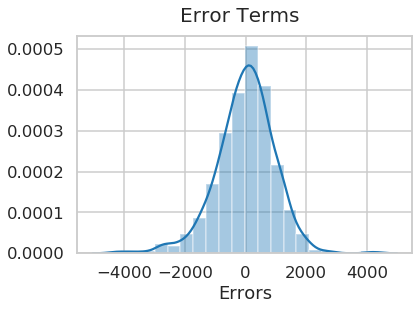

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((yTrain - yTrainCnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

## Observation

- The above histogram clearly shows that the residuals/errors are normally distributed with their mean centered at 0
- This validates on of the main assumptions of a linear regression model

## Predictions

In [83]:
# Scaling test data
testingData[continousVars] = minMaxScaler.transform(testingData[continousVars])

In [84]:
## Splitting test data into x & y
xTest = testingData
yTest = testingData.pop('cnt')
print('Shape xTest: ', xTest.shape)
print('Shape yTest: ', yTest.shape)



Shape xTest:  (220, 28)
Shape yTest:  (220,)


In [85]:
### Making predictions using model 8

xTestWithCols = xTest[xTrainWithCols.columns]
xTestWithCols = sm.add_constant(xTestWithCols)
xTestWithCols.head()

,const,yr,holiday,season_spring,season_summer,season_winter,mnth_Jan,mnth_Sep,weathersit_Light Snow/Light Rain & Scattered Clouds,weathersit_Mist & Clouds
184,1.0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,0,1,0,0,0,0,0
299,1.0,0,0,0,0,1,0,0,0,1
221,1.0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,1,0,0,0,0,0


In [86]:
xTestWithCols.shape

(220, 10)

Text(0, 0.5, 'yPred')

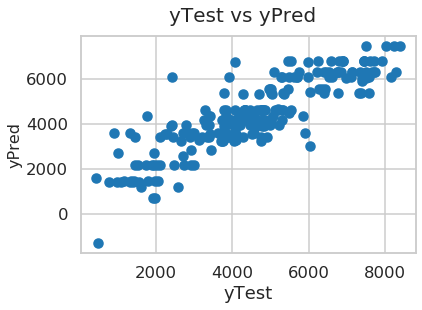

In [87]:
## Plotting Predictions

yPredict = linearModel.predict(xTestWithCols)
fig = plt.figure()
plt.scatter(yTest,yPredict)
fig.suptitle('yTest vs yPred', fontsize=20)              # Plot heading 
plt.xlabel('yTest', fontsize=18)                          # X-label
plt.ylabel('yPred', fontsize=16)  

In [88]:
from sklearn.metrics import r2_score

r2_score(yTest, yPredict)

0.7441262497033887

## Conclusion

The r-squared score on our test data is 0.7441262497033887, which is very close to the r-squared value for our training set at 0.756 in model 8.


The Final model for linear regression is model - 8